### BM-25 based redaction

We think that the model we have now is good, but it's failing on cases where the hardest words are almost redacted in order of how difficult they are rated from BM25. We want to develop a function that looks like `redact(text: str, p: float)` where `p%` of words are redacted, **in order of importance as measured by BM-25**. This notebook is where I'll figure out how to do this!

In [1]:
from rank_bm25 import BM25Okapi

In [12]:
from typing import List

import datasets
import os
import re

from nltk.corpus import stopwords

num_cpus = len(os.sched_getaffinity(0))
eng_stopwords = stopwords.words('english')

words_from_text_re = re.compile(r'\b\w+\b')
def words_from_text(s: str) -> List[str]:
    assert isinstance(s, str)
    return words_from_text_re.findall(s)

def get_words_from_doc(s: str) -> List[str]:
    words = words_from_text(s)
    return [w for w in words]

profile_corpus = []
document_corpus = []
for split in ['test[:100%]', 'val[:100%]']:
    prof_data = datasets.load_dataset('wiki_bio', split=split, version='1.2.0')

    def make_table_str(ex):
        ex['table_str'] = (
            ' '.join(ex['input_text']['table']['column_header'] + ex['input_text']['table']['content'])
        )
        return ex

    prof_data = prof_data.map(make_table_str, num_proc=num_cpus)
    profile_corpus.extend(prof_data['table_str'])
    document_corpus.extend(prof_data['target_text'])

    print("tokenizing corpi")
    tokenized_document_corpus = [
        get_words_from_doc(doc) for doc in document_corpus
    ]
    tokenized_profile_corpus = [
        get_words_from_doc(prof) for prof in profile_corpus
    ]

    print("creating search index")

bm25 = BM25Okapi(tokenized_profile_corpus)

Using custom data configuration default
Reusing dataset wiki_bio (/home/jxm3/.cache/huggingface/datasets/wiki_bio/default/1.2.0/c05ce066e9026831cd7535968a311fc80f074b58868cfdffccbc811dff2ab6da)


Loading cached processed dataset at /home/jxm3/.cache/huggingface/datasets/wiki_bio/default/1.2.0/c05ce066e9026831cd7535968a311fc80f074b58868cfdffccbc811dff2ab6da/cache-e3602349ec2514fc.arrow


Loading cached processed dataset at /home/jxm3/.cache/huggingface/datasets/wiki_bio/default/1.2.0/c05ce066e9026831cd7535968a311fc80f074b58868cfdffccbc811dff2ab6da/cache-75b832f7a3bbc565.arrow


Loading cached processed dataset at /home/jxm3/.cache/huggingface/datasets/wiki_bio/default/1.2.0/c05ce066e9026831cd7535968a311fc80f074b58868cfdffccbc811dff2ab6da/cache-e0950270b9f9d578.arrow


Loading cached processed dataset at /home/jxm3/.cache/huggingface/datasets/wiki_bio/default/1.2.0/c05ce066e9026831cd7535968a311fc80f074b58868cfdffccbc811dff2ab6da/cache-b5d2c33ba9fa845b.arrow


Loading cached processed dataset at /home/jxm3/.cache/huggingface/datasets/wiki_bio/default/1.2.0/c05ce066e9026831cd7535968a311fc80f074b58868cfdffccbc811dff2ab6da/cache-ac82985692114ad5.arrow


Loading cached processed dataset at /home/jxm3/.cache/huggingface/datasets/wiki_bio/default/1.2.0/c05ce066e9026831cd7535968a311fc80f074b58868cfdffccbc811dff2ab6da/cache-089147a0f5df4208.arrow


Loading cached processed dataset at /home/jxm3/.cache/huggingface/datasets/wiki_bio/default/1.2.0/c05ce066e9026831cd7535968a311fc80f074b58868cfdffccbc811dff2ab6da/cache-41f63d684696d460.arrow


Loading cached processed dataset at /home/jxm3/.cache/huggingface/datasets/wiki_bio/default/1.2.0/c05ce066e9026831cd7535968a311fc80f074b58868cfdffccbc811dff2ab6da/cache-5cb952b6ab7c9e52.arrow


tokenizing corpi
creating search index


Using custom data configuration default
Reusing dataset wiki_bio (/home/jxm3/.cache/huggingface/datasets/wiki_bio/default/1.2.0/c05ce066e9026831cd7535968a311fc80f074b58868cfdffccbc811dff2ab6da)


Loading cached processed dataset at /home/jxm3/.cache/huggingface/datasets/wiki_bio/default/1.2.0/c05ce066e9026831cd7535968a311fc80f074b58868cfdffccbc811dff2ab6da/cache-3c1a083eaafb2613.arrow


Loading cached processed dataset at /home/jxm3/.cache/huggingface/datasets/wiki_bio/default/1.2.0/c05ce066e9026831cd7535968a311fc80f074b58868cfdffccbc811dff2ab6da/cache-10591a407843bfc7.arrow


Loading cached processed dataset at /home/jxm3/.cache/huggingface/datasets/wiki_bio/default/1.2.0/c05ce066e9026831cd7535968a311fc80f074b58868cfdffccbc811dff2ab6da/cache-f19feca32d67cc2c.arrow


Loading cached processed dataset at /home/jxm3/.cache/huggingface/datasets/wiki_bio/default/1.2.0/c05ce066e9026831cd7535968a311fc80f074b58868cfdffccbc811dff2ab6da/cache-f833e1ed70828dfe.arrow


Loading cached processed dataset at /home/jxm3/.cache/huggingface/datasets/wiki_bio/default/1.2.0/c05ce066e9026831cd7535968a311fc80f074b58868cfdffccbc811dff2ab6da/cache-f676ddffb469016b.arrow


Loading cached processed dataset at /home/jxm3/.cache/huggingface/datasets/wiki_bio/default/1.2.0/c05ce066e9026831cd7535968a311fc80f074b58868cfdffccbc811dff2ab6da/cache-944bd579cd5506d4.arrow


Loading cached processed dataset at /home/jxm3/.cache/huggingface/datasets/wiki_bio/default/1.2.0/c05ce066e9026831cd7535968a311fc80f074b58868cfdffccbc811dff2ab6da/cache-34155b01c146257f.arrow


Loading cached processed dataset at /home/jxm3/.cache/huggingface/datasets/wiki_bio/default/1.2.0/c05ce066e9026831cd7535968a311fc80f074b58868cfdffccbc811dff2ab6da/cache-9f7ba753fdbc342d.arrow


tokenizing corpi
creating search index


In [13]:
class JointBM250kapi(BM25Okapi):
    """A BM250kapi that takes extra documents to calculate idf but only returns scores within initial set of documents.
    
    This allows us to search only among profiles but use both profiles and documents to calculate inverse document frequency
    of terms. That's especially useful since stopwords mostly just appear in documents (and in a small set of profiles with
    captions) but they don't provide much utility to the search.
    """
    def __init__(self, corpus, extra_corpus):
        super().__init__(corpus + extra_corpus)
        self.doc_freqs = self.doc_freqs[:len(corpus)] # truncate extra docs
        self.doc_len = self.doc_len[:len(corpus)]
        # avgdl = num_doc / self.corpus_size
        self.avgdl = self.avgdl * (len(corpus) / (len(corpus) + len(extra_corpus)))
        

In [14]:
bm25 = JointBM250kapi(tokenized_profile_corpus, tokenized_document_corpus)

In [15]:
bm25.corpus_size # sum of test + val dataset sizes

291324

In [16]:
sample_doc = document_corpus[0]

In [17]:
sample_doc_words = list(set(words_from_text(sample_doc)))
sample_doc_words.sort(key=lambda w: (-bm25.idf.get(w, 0.0)))

for w in sample_doc_words:
    print(w, bm25.idf.get(w, 0.0))

shenoff 12.176724504431347
randle 9.164363378277095
phase 7.942267812291349
tenth 6.682416246659953
secondary 6.560972230989606
leonard 6.0395066233808965
senators 6.010966131503275
pick 5.637934490407113
overall 4.403965970698012
round 4.186073572798504
1949 4.037463892438424
baseball 3.9486876358389082
draft 3.8919954451031877
washington 3.8761764295177983
1970 3.683410266217635
major 3.5226655731424987
lrb 2.859422313458033
rrb 2.859422313458033
12 2.603485398043274
player 2.5077069072136684
former 2.4743723161030413
league 2.440133765756725
first 2.288199056135266
february 2.1931882679683454
june 2.0760727918624973
he 0.948935536925271
was 0.8978651759121608
born 0.7564469169458956
is 0.5934747562802407
a 0.23536180835126608
in 0.22460724219998873
of 0.17771157057852704
the 0.023713459917809487


In [18]:
def fixed_redact_str(text: str, words_to_mask: List[str], mask_token: str = '<mask>') -> str:
    for w in words_to_mask:
        text = re.sub(
            (r'\b{}\b').format(re.escape(w)),
            mask_token, text, count=0
        )
    return text

def redact(document: str, p: float):
    words = list(set(words_from_text(sample_doc)))
    words.sort(key=lambda w: (-bm25.idf.get(w, 0.0)))
    n = round(len(sample_doc_words) * p)
    return fixed_redact_str(text=document, words_to_mask=words[:n])


for a in [0.2, 0.4, 0.6, 0.8, 1.0]:
    print(redact(sample_doc, a))
    print('\n')

<mask> <mask> <mask> -lrb- born february 12 , 1949 -rrb- is a former major league baseball player .
he was the first-round pick of the washington <mask> in the <mask> <mask> of the june 1970 major league baseball draft , <mask> overall .



<mask> <mask> <mask> -lrb- born february 12 , <mask> -rrb- is a former major league <mask> player .
he was the first-<mask> <mask> of the washington <mask> in the <mask> <mask> of the june 1970 major league <mask> <mask> , <mask> <mask> .



<mask> <mask> <mask> -<mask>- born february <mask> , <mask> -<mask>- is a former <mask> league <mask> <mask> .
he was the first-<mask> <mask> of the <mask> <mask> in the <mask> <mask> of the june <mask> <mask> league <mask> <mask> , <mask> <mask> .



<mask> <mask> <mask> -<mask>- born <mask> <mask> , <mask> -<mask>- is a <mask> <mask> <mask> <mask> <mask> .
<mask> was the <mask>-<mask> <mask> of the <mask> <mask> in the <mask> <mask> of the <mask> <mask> <mask> <mask> <mask> <mask> , <mask> <mask> .



<mask> <

In [20]:
import pickle

pickle.dump(bm25.idf, open('../test_val_100_idf.p', 'wb'))

In [21]:
pickle.load(open('../test_val_100_idf.p', 'rb'))

{'name': 0.08236009107251618,
 'finalteam': 4.178424285965077,
 'debutdate': 4.218451135066127,
 'position': 1.7621173233474305,
 'bats': 4.147261202804332,
 'finaldate': 4.5076960105226025,
 'finalyear': 4.060898787527444,
 'debutyear': 3.7771657141903905,
 'debutteam': 3.9013206378601772,
 'statlabel': 3.8364018124539268,
 'statvalue': 3.8377312073505436,
 'throws': 4.209844119476378,
 'birth_place': 0.4356866030662605,
 'birth_date': 0.263838638941678,
 'article_title': 0.0,
 'lenny': 8.133384855767316,
 'randle': 9.164363378277095,
 'seattle': 5.2762860341103615,
 'mariners': 6.595634440125024,
 'june': 2.0760727918624973,
 '16': 2.75880102528963,
 'second': 3.2628532844366926,
 'baseman': 5.413414658266332,
 'third': 4.0400866233821375,
 'switch': 6.8429444717174075,
 '20': 2.704091732387342,
 '1982': 3.407713557680246,
 '1971': 3.7038419291249554,
 'washington': 3.8761764295177983,
 'senators': 6.010966131503275,
 'batting': 3.960219557942912,
 'average': 4.009435812365869,
 'hom

In [24]:
import pandas as pd
df = pd.DataFrame(bm25.idf.items(), columns=['word', 'idf'])

In [25]:
df.sort_values(by='word')

,word,idf
185,0,2.145592
1601,00,5.736825
3649,000,4.925028
1135,0000,5.918293
146080,00000,12.176725
...,...,...
336407,ﺳﻠﯿﻢ,12.176725
336408,ﺷﻴﺮوﺍﻧﻰ,12.176725
101982,ﻣﯿﮟ,11.665895
316619,ﻣﺤﻤﺪ,12.176725


<AxesSubplot:>

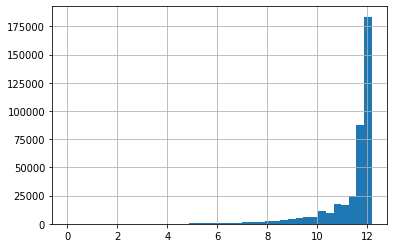

In [26]:
df['idf'].hist(bins=40)

In [42]:
df['idf'].mean()

11.437707231811393

In [28]:
df['idf'].max()

12.176724504431347

In [30]:
(df['idf'] > 12).mean()

0.4700715721547188

In [45]:
date_idf = bm25.idf.copy()
# Date-modifications for idf.

for year in range(1000, 2022):
    if str(year) in date_idf:
        date_idf[str(year)] = max(
            date_idf[str(year)], 10
        )

for day in range(1, 31+1):
    assert str(day) in date_idf
    date_idf[str(day)] = 10
            

for month in ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']:
    assert month in date_idf
    date_idf[str(month)] = 10

In [46]:
pickle.dump(date_idf, open('../test_val_100_idf_dates.p', 'wb'))